<h1><center>Laboratorio 8: Predicciones y Recomendaciones 🔮🪄 </center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2024</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: Carolina Nuñez
- Nombre de alumno 2: Alonso Uribe

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.
- Código que no se pueda ejecutar, no será revisado.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [ ]:
# # Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
# try:
#     from google.colab import drive
#     drive.mount("/content/drive")
#     path = 'Dirección donde tiene los archivos en el Drive'
# except:
#     print('Ignorando conexión drive-colab')

In [ ]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<!-- <center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 /> -->

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [ ]:
eh = pd.read_csv("energia_homero.csv")
eh["date"] = pd.to_datetime(eh["date"])
eh.info()

px.line(eh, x="date", y="Energy_kWh", title="KWH en el tiempo")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1498 non-null   datetime64[ns]
 1   Energy_kWh  1498 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.5 KB


In [ ]:
eh.rename(axis=1, mapper={"Energy_kWh": "y", "date":"ds"}, inplace=True)

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<!-- <center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 /> -->

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [ ]:
eh['set'] = np.where(eh.ds > pd.Timestamp('2020-02-29'), 'Test', 'Train')
train = eh[eh['set'] == 'Train'].copy()
test = eh[eh['set'] == 'Test'].copy()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from plotly import graph_objects as go

x_axis = np.arange(len(train)).reshape((-1,1))
Pipeline_trend = Pipeline([('reg', LinearRegression(fit_intercept=True, copy_X=True))])
m = Pipeline_trend.fit(X=x_axis, y=train['y'])
lm = m.get_params()['reg']
a , b= lm.coef_, lm.intercept_
y_hat = m.predict(np.arange(x_axis[-1], x_axis[-1]+len(test)).reshape((-1,1)))

fig = go.Figure(go.Scatter(x=train['ds'], y=train['y'], line=dict(color='royalblue')))
fig.add_traces(go.Scatter(x=train['ds'], y=a*x_axis[:,0] + b, line=dict(color='red')))
fig.add_traces(go.Scatter(x=test['ds'], y=test['y'], line=dict(color='firebrick')))
fig.add_traces(go.Scatter(x=test['ds'], y=y_hat, line=dict(color='blue')))
fig.show()
print("MAE train: ", mean_absolute_error(train['y'], a*x_axis[:,0] + b), "MAE test: ", mean_absolute_error(test['y'], y_hat))


C:\Users\aurib\AppData\Local\Temp\ipykernel_17116\857139688.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



MAE train:  10.568154088025606 MAE test:  8.65469543458591


In [ ]:
fig = go.Figure(go.Scatter(x=train['ds'], y=train['y']-(a*x_axis[:,0]+b), line=dict(color='royalblue')))
fig.add_traces(go.Scatter(x=test['ds'], y=test['y']-y_hat, line=dict(color='firebrick')))

Se observa en terminos cualitativos cierta periodicidad de los datos al rededor de un año

In [ ]:
from scipy import fft
freqs = np.abs(fft.fft(train['y']))
fig = go.Figure(go.Scatter(y=freqs, line=dict(color='royalblue')))
fig.update_layout(yaxis_range=[0,10000], xaxis_range=[0,500])

fig

Existe una periodicidad más marcada en los 4 días, luego al rededor de los 30 menos marcada. No se percibe una periodicidad anual marcada, más si leve, al rededor de los 195 días. Esto último puede deberse al tamaño del dataset y la limitada información respecto al comportamiento anual del fenómeno.

## 1.3 Un Consejo para Homero [6 puntos]

<!-- <center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 /> -->

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [ ]:
# 1
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [ ]:

model = Prophet()
# 2
model.fit(train)
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01,29.627207,24.689271,42.522198,29.627207,29.627207,4.100848,4.100848,4.100848,-0.530377,-0.530377,-0.530377,4.631224,4.631224,4.631224,0.0,0.0,0.0,33.728054
1,2016-06-02,29.595809,25.043675,43.124367,29.595809,29.595809,4.763175,4.763175,4.763175,-0.425916,-0.425916,-0.425916,5.189091,5.189091,5.189091,0.0,0.0,0.0,34.358983
2,2016-06-03,29.564411,25.902214,44.003272,29.564411,29.564411,5.099715,5.099715,5.099715,-0.666946,-0.666946,-0.666946,5.766661,5.766661,5.766661,0.0,0.0,0.0,34.664125
3,2016-06-04,29.533013,27.948549,45.732014,29.533013,29.533013,7.431900,7.431900,7.431900,1.076570,1.076570,1.076570,6.355330,6.355330,6.355330,0.0,0.0,0.0,36.964912
4,2016-06-05,29.501614,29.627904,46.822446,29.501614,29.501614,8.628849,8.628849,8.628849,1.682383,1.682383,1.682383,6.946466,6.946466,6.946466,0.0,0.0,0.0,38.130464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,2020-07-03,17.714821,20.893615,37.717877,17.190055,18.243645,12.203266,12.203266,12.203266,-0.666946,-0.666946,-0.666946,12.870212,12.870212,12.870212,0.0,0.0,0.0,29.918086
1494,2020-07-04,17.707868,23.143929,40.933366,17.174128,18.243449,14.038893,14.038893,14.038893,1.076570,1.076570,1.076570,12.962322,12.962322,12.962322,0.0,0.0,0.0,31.746761
1495,2020-07-05,17.700916,23.128465,41.856319,17.157593,18.246294,14.742172,14.742172,14.742172,1.682383,1.682383,1.682383,13.059788,13.059788,13.059788,0.0,0.0,0.0,32.443088
1496,2020-07-06,17.693964,21.396405,38.649443,17.140244,18.248163,12.823978,12.823978,12.823978,-0.335666,-0.335666,-0.335666,13.159644,13.159644,13.159644,0.0,0.0,0.0,30.517942


In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          1498 non-null   datetime64[ns]
 1   trend                       1498 non-null   float64       
 2   yhat_lower                  1498 non-null   float64       
 3   yhat_upper                  1498 non-null   float64       
 4   trend_lower                 1498 non-null   float64       
 5   trend_upper                 1498 non-null   float64       
 6   additive_terms              1498 non-null   float64       
 7   additive_terms_lower        1498 non-null   float64       
 8   additive_terms_upper        1498 non-null   float64       
 9   weekly                      1498 non-null   float64       
 10  weekly_lower                1498 non-null   float64       
 11  weekly_upper                1498 non-null   float64     

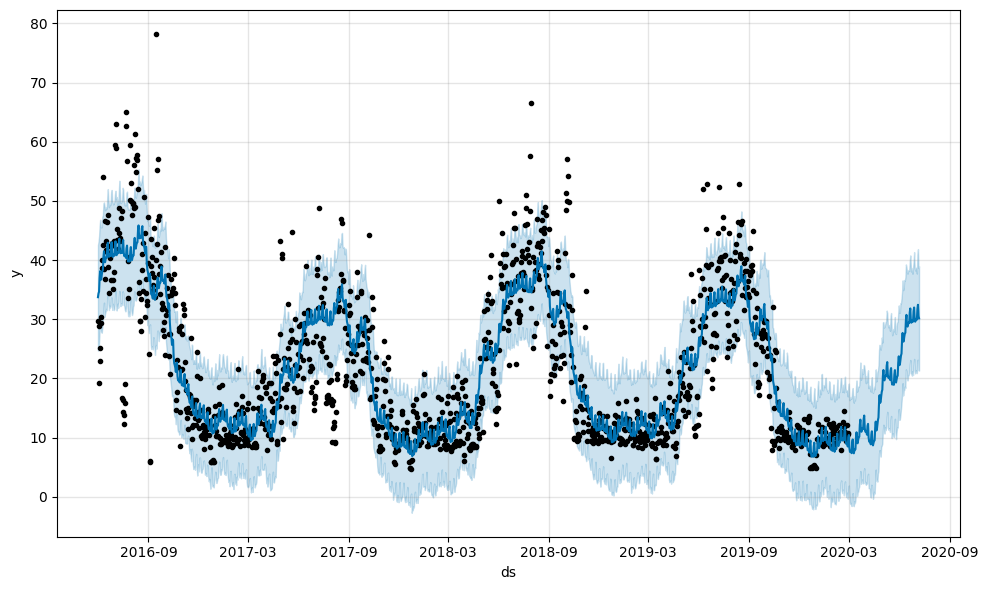

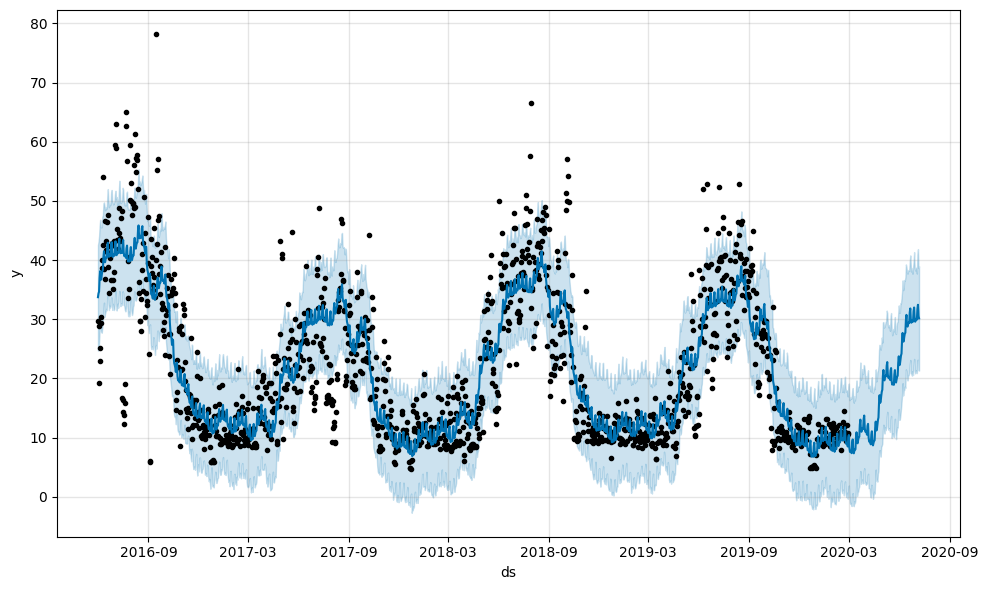

In [ ]:
# 3
model.plot(forecast, )

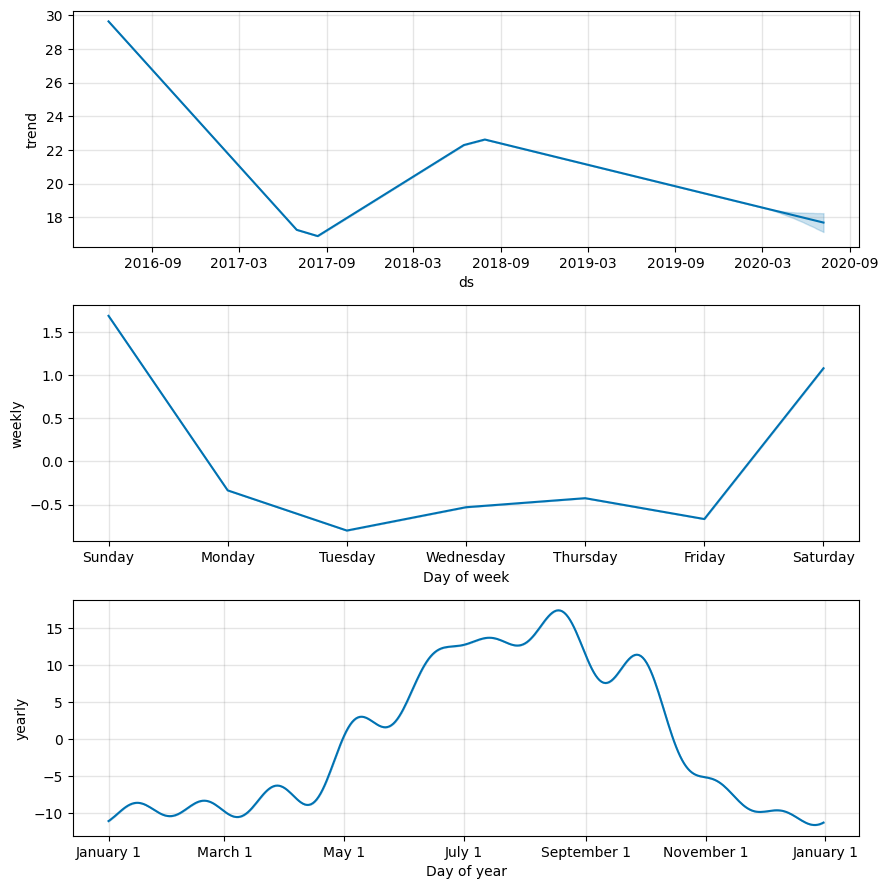

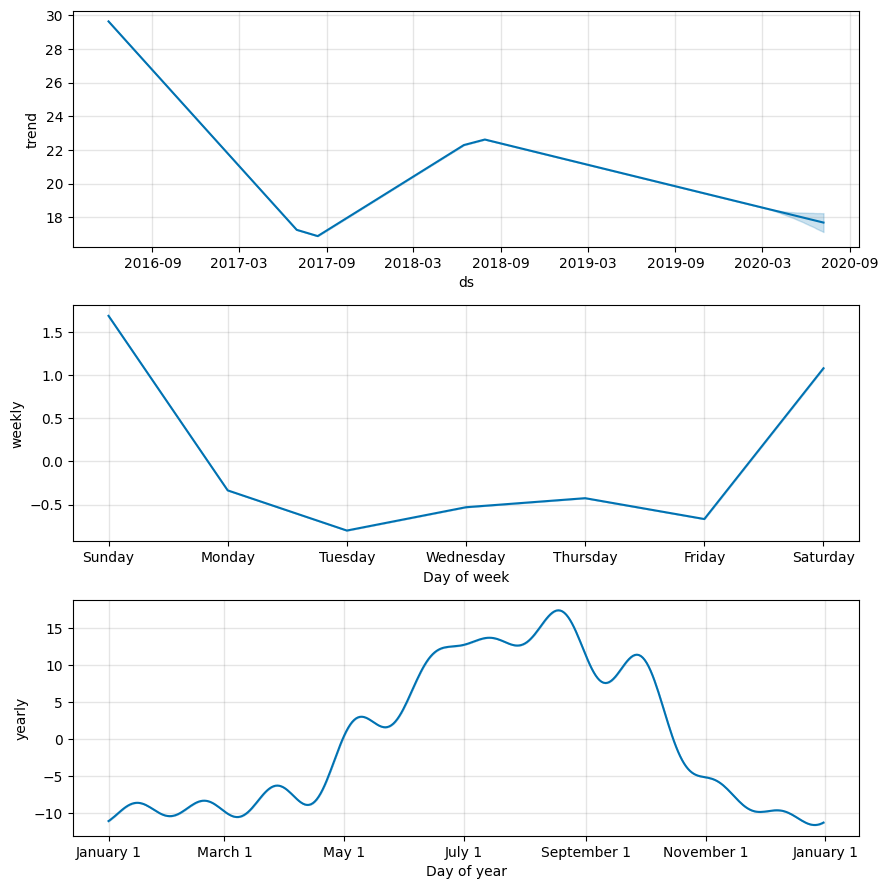

In [ ]:
model.plot_components(forecast)

In [ ]:
# 4
foretrain = forecast.loc[forecast['ds'] < "2020-03-01", 'yhat']
foretest = forecast.loc[forecast['ds'] >= "2020-03-01", 'yhat']
print("MAE en entrenamiento: ", mean_absolute_error(train['y'], foretrain))
print("MAE en entrenamiento: ", mean_absolute_error(test['y'], foretest))

MAE en entrenamiento:  4.820456421417842
MAE en entrenamiento:  4.934029048086043


In [ ]:
fig = go.Figure(go.Scatter(x=train['ds'], y=train['y']-foretrain, line=dict(color='royalblue')))
fig.add_traces(go.Scatter(x=test['ds'], y=test['y']-foretest, line=dict(color='firebrick')))

El error es mucho menor en MEA en relación a una regresión lineal. Esto puede verse de manera cualitativa en el gráfico de error, se apega mucho más a cero y sus perturbaciones son menores.

Respecto a la estacionalidad, el modelo automaticamente define una estacionalidad semanal y anual, se percibe como significante.

## 1.4 Incluyendo Regresores [5 puntos]

<!-- <center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 /> -->

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

In [ ]:
# 1
regg = pd.read_csv("datos_frink")
model = Prophet()
model.add_regressor('')

## 1.5 Aplicando Lags [7 puntos]

<!-- <center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 /> -->

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [ ]:
#CODIGO AQUI

## 1.6 Optimizando Prophet [6 puntos]

<!-- <center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 /> -->

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
#CODIGO AQUI

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<!-- <center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 /> -->

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 6.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357288 sha256=ac2601542d16401a0f46f35178e48f52abc63c71958db54cc60a6abf578b7cf6
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [63]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [84]:
#CODIGO AQUI
beer_df = pd.read_csv('cervezas.csv')

print(beer_df.isna().sum())
print('Datos sin valores nulos')
print('-----------------------------------------------------')
print('Número de cervezas: ',beer_df['beerId'].unique().sum())
print('Número de ciudadanos entrevistados: ', beer_df['userId'].unique().sum())

userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64
Datos sin valores nulos
-----------------------------------------------------
Número de cervezas:  88654656
Número de ciudadanos entrevistados:  2802224


In [85]:
beer_df

,userId,beerId,rating,beerName,beerStyle
0,144,995,3.0,Mai Bock,Maibock / Helles Bock
1,63,58695,4.0,Hop In The Dark Cascadian Dark Ale,American Black Ale
2,147,4083,5.0,Stone Ruination IPA,American Double / Imperial IPA
3,4261,40310,3.0,Noël Des Géants,Herbed / Spiced Beer
4,140,1904,5.0,Sierra Nevada Celebration Ale,American IPA
...,...,...,...,...,...
295054,863,45653,4.0,Consecration,American Wild Ale
295055,306,1341,4.0,Keystone Light,Light Lager
295056,8,8917,3.0,Drop Top Amber,American Amber / Red Ale
295057,35,102,3.0,Samuel Adams Octoberfest,Märzen / Oktoberfest


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

In [65]:
print('Cantidad de usuarios: ', beer_df['userId'].unique().size)
print('Cantidad de productos: ', beer_df['beerId'].unique().size)
print('Cantidad de calificaciones: ', beer_df['rating'].count())
print('Cantidad de calificaciones faltantes: ', beer_df['rating'].isna().sum())

Cantidad de usuarios:  706
Cantidad de productos:  3747
Cantidad de calificaciones:  295059
Cantidad de calificaciones faltantes:  0


In [66]:
beer = beer_df.groupby('beerName').agg({'rating':'mean'}).reset_index()
fig = px.scatter(beer, x='beerName', y='rating', height=600)
fig.update_traces(marker=dict(color='pink', opacity=1))
fig.add_hline(y=beer_df.rating.mean(), line_color="blue", annotation_text="Media general",
              annotation=dict(font=dict(size=20, color='blue')), annotation_position="top left")
fig.update_xaxes(tickangle=45)  # Rotate x-axis ticks by 45 degrees

Al revisar la media de las calificaciones por cerveza es posible observar que estas se distribuyen entorno a la media general de los datos.

In [67]:
# 2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

beer_df.pivot_table(index='beerName', columns='userId', values='rating')


userId,1,3,4,5,6,8,9,14,18,20,...,23922,23973,23980,24018,24355,24903,25317,25923,27039,27681
beerName,,,,,,,,,,,,,,,,,,,,,
"""Shabadoo"" Black & Tan Ale",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
# 100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
't Gaverhopke Extra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
't Smisje Calva Reserva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Éphémère (Cranberry),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Équinoxe Du Printemps,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ølfabrikken Porter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 Método Basado en Contenido [4 puntos]

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [68]:
#CODIGO AQUI
beer2 = beer_df[['beerId', 'beerName', 'beerStyle']].drop_duplicates()

In [69]:
# Bag of words de beerStyle
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase = True,
                             min_df = 10, # mínimo 10 ocurrencias
                             stop_words = 'english')
bow = vectorizer.fit_transform(beer2['beerStyle']).toarray()
words_beer = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

def similar_beers(df, beer_name):
  df = df.reset_index()
  assert beer_name in df['beerName'].values, 'Cerveza no encontrada:c'

  vectorizer = CountVectorizer(lowercase=True, min_df=10, stop_words='english')
  bow = vectorizer.fit_transform(df['beerStyle']).toarray()
  wordsBeer = pd.DataFrame(bow, columns=vectorizer.get_feature_names_out())
  cosine_sim = cosine_similarity(wordsBeer, words_beer)

  idx = df[df['beerName'] == beer_name].index[0]

  sim_scores = list(enumerate(cosine_sim[idx]))

  # cervezas reordeandas según similitud a beer_name, solo primeras 5
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
  beer_ind = [i[0] for i in sim_scores]

  return print('Recomendaciones de cervezas: ',
               df['beerName'].iloc[beer_ind].to_list())

similar_beers(beer2, 'Chocolate Porter')

Recomendaciones de cervezas:  ['Great Lakes Edmund Fitzgerald Porter', 'Perseus Porter', 'Southampton Imperial Porter', 'Kona Coffee Macadamia Coconut Porter', 'Black Marlin Porter']


In [71]:
# Recomendaciones usando rating de Carl
data_carl = beer_df.loc[(beer_df['userId']==100)]
data_carl[data_carl.rating==data_carl.rating.max()].drop_duplicates()

,userId,beerId,rating,beerName,beerStyle
8730,100,1393,4.5,McNeill's Extra Special Bitter,Extra Special / Strong Bitter (ESB)
14677,100,1814,4.5,McNeill's Pullman's Porter,American Porter
19328,100,1884,4.5,McNeill's Dead Horse IPA,English India Pale Ale (IPA)
20832,100,325,4.5,McNeill's Firehouse Amber Ale,American Amber / Red Ale
31934,100,48798,4.5,McNeill's Warlord Imperial IPA,American Double / Imperial IPA


Dado que se encontraron 5 cervezas con la máxima evaluación, solo consideraremos la primera para generar las 5 recomendaciones

In [72]:
# Cerveza mejor evaluada por Carl + 5 más similares a ella

similar_beers(beer2, "McNeill's Extra Special Bitter")

Recomendaciones de cervezas:  ['Adnams SSB (Suffolk Special Bitter)', 'Redhook ESB', 'Sweetwater Motor Boat', "Young's Ram Rod", "Young's Special London Ale"]


## 2.3 Filtros Colaborativos [16 puntos]

<!-- <center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 /> -->

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [73]:
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic, NMF, SVD
from surprise.accuracy import mae

In [74]:
reader = Reader(rating_scale = (1, 5)) # instanciamos reader, es importante definir la escala de los valores (ratings)

# Surprise dataset
df_surprise = Dataset.load_from_df(beer_df[['userId', 'beerId', 'rating']].copy(), reader)

# Train Test dataset
df_train, df_test = train_test_split(df_surprise, test_size = 0.3, random_state = 29)
df_train

Sí importa el orden. El método load_from_df recibe las columnas en orden, tal que la primera es el id de usuario, la segunda el id del item y la tercera los ratings del item segun usuario.


In [75]:
modelo_user = KNNBasic(sim_options = {"name": "cosine", "user_based": True})
modelo_user.fit(df_train)
prediction_user = modelo_user.test(df_test)
df_predict_user = pd.DataFrame(prediction_user)
print('Modelo basado en usuarios')
mae(prediction_user, verbose=True)
df_predict_user

Computing the cosine similarity matrix...
Done computing similarity matrix.
Modelo basado en usuarios
MAE:  0.4637


,uid,iid,r_ui,est,details
0,113,572,4.0,4.087500,"{'actual_k': 40, 'was_impossible': False}"
1,113,782,5.0,4.350000,"{'actual_k': 40, 'was_impossible': False}"
2,148,48194,4.5,4.014286,"{'actual_k': 35, 'was_impossible': False}"
3,28,23942,4.5,3.825000,"{'actual_k': 40, 'was_impossible': False}"
4,141,16403,2.0,4.187500,"{'actual_k': 40, 'was_impossible': False}"
...,...,...,...,...,...
88513,22,26072,4.0,3.850000,"{'actual_k': 40, 'was_impossible': False}"
88514,223,699,4.5,4.105263,"{'actual_k': 19, 'was_impossible': False}"
88515,26,1558,4.5,4.362500,"{'actual_k': 40, 'was_impossible': False}"
88516,18149,36728,4.0,3.800000,"{'actual_k': 40, 'was_impossible': False}"


In [76]:
modelo_prod = KNNBasic(sim_options = {"name": "cosine", "user_based": False})
modelo_prod.fit(df_train)
prediction_prod = modelo_prod.test(df_test)
df_predict_prod = pd.DataFrame(prediction_prod)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [77]:
print('Modelo basado en productos')
mae(prediction_prod)

Modelo basado en productos
MAE:  0.4633


0.4633275758766579

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [78]:
#CODIGO AQUI
model_nmf = NMF(random_state = 29) # instanciamos modelo NMF (cambiar a modelo de preferencia)
model_nmf.fit(df_train) # fit del modelo
predict_nmf = model_nmf.test(df_test)
df_pred_nmf = pd.DataFrame(predict_nmf)
print('MAE de NMF predictions: ', mae(predict_nmf))
df_pred_nmf

MAE:  0.4746
MAE de NMF predictions:  0.47455447282146707


,uid,iid,r_ui,est,details
0,113,572,4.0,4.137754,{'was_impossible': False}
1,113,782,5.0,4.088352,{'was_impossible': False}
2,148,48194,4.5,4.086265,{'was_impossible': False}
3,28,23942,4.5,3.932113,{'was_impossible': False}
4,141,16403,2.0,4.125075,{'was_impossible': False}
...,...,...,...,...,...
88513,22,26072,4.0,3.587102,{'was_impossible': False}
88514,223,699,4.5,4.050050,{'was_impossible': False}
88515,26,1558,4.5,4.414853,{'was_impossible': False}
88516,18149,36728,4.0,3.624009,{'was_impossible': False}


In [149]:
model_SVD = SVD(random_state = 29)
model_SVD.fit(df_train)
predict_SVD = model_SVD.test(df_test)
df_pred_SVD = pd.DataFrame(predict_SVD)
print('MAE de SVD predictions: ', mae(predict_SVD))
df_pred_SVD

MAE:  0.4603
MAE de SVD predictions:  0.4603230193533955


,uid,iid,r_ui,est,details
0,113,572,4.0,4.284926,{'was_impossible': False}
1,113,782,5.0,4.187089,{'was_impossible': False}
2,148,48194,4.5,4.031066,{'was_impossible': False}
3,28,23942,4.5,3.910991,{'was_impossible': False}
4,141,16403,2.0,4.064983,{'was_impossible': False}
...,...,...,...,...,...
88513,22,26072,4.0,3.736061,{'was_impossible': False}
88514,223,699,4.5,4.087521,{'was_impossible': False}
88515,26,1558,4.5,4.373416,{'was_impossible': False}
88516,18149,36728,4.0,3.775722,{'was_impossible': False}


Como el error absoluto promedio obtenido con SVD es menor, entonces se utilizarán sus predicciones para la sgte sección.

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<!-- <center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 /> -->

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



**Respuesta:**

In [145]:
from collections import defaultdict

def get_top_n(predictions, n, without=False):

    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
      if not without:
        top_n[uid].append((iid, est))
      else:
        if pd.isna(true_r):
          top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
      user_ratings = list(set(user_ratings))
      user_ratings.sort(key=lambda x: x[1], reverse=True)
      top_n[uid] = user_ratings[:n]

    return top_n


In [139]:
beer_df = pd.read_csv('cervezas.csv')
carl_id = 100
carl_beers = beer_df.loc[beer_df['userId']==carl_id].drop(columns=['beerName', 'beerStyle']).convert_dtypes()
carl_beers.drop_duplicates(subset='beerId', inplace=True)
carl_beers.set_index('beerId', inplace=True)
carl_beers = carl_beers.reindex(index=beer_df['beerId'].unique())
# (~carl_beers.isna()).sum()
carl_beers['userId'] = carl_id
carl_beers.reset_index(inplace=True)
carl_beers.sort_values(by='beerId', inplace=True)
beers = [(uid,iid,r) for iid,uid,r in carl_beers.values]

In [140]:
# 1
top_n = get_top_n(model_SVD.test(beers), n=3)
top_n[100]

[(43929, 4.497086732178718),
 (60426, 4.376877075875904),
 (17112, 4.340363568550107)]

In [146]:
# 2
top_n = get_top_n(model_SVD.test(beers), n=5, without=True)
top_n[100]

[(43929, 4.497086732178718),
 (60426, 4.376877075875904),
 (17112, 4.340363568550107),
 (62397, 4.304921027183767),
 (38149, 4.293703560720363)]

1393	4.5	McNeill's Extra Special Bitter	Extra Special / Strong Bitter (ESB)
14677	100	1814	4.5	McNeill's Pullman's Porter	American Porter
19328	100	1884	4.5	McNeill's Dead Horse IPA	English India Pale Ale (IPA)
20832	100	325	4.5	McNeill's Firehouse Amber Ale	American Amber / Red Ale
31934	100	48798

In [153]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

In [190]:
precs, recs = precision_recall_at_k(predict_SVD)
pd.DataFrame(precs.items())[1].mean()
pd.DataFrame(recs.items())[1].mean()

0.3367541120560687

Parece ser un buen modelo respecto a lo predicho (media por usuario precision=0.73) dado este threshold. Pero para acercarse a los datos reales (media por usuario recall=0.33)

In [168]:
ks = range(3, 25)
precs = []
recs = []
for k in ks:
  prec, rec = precision_recall_at_k(predict_SVD, k=k)
  precs.append(pd.DataFrame(prec.items())[1].mean())
  recs.append(pd.DataFrame(rec.items())[1].mean())

In [170]:
px.scatter(x=ks, y=precs)

Mietras mayor sea k, más ratings por usuario se consideraran para la métrica. En este caso para precision, más ratings significa una baja en la métrica, es decir más errada es la diferencia con lo predicho según un threshold fijo.

In [171]:
px.scatter(x=ks, y=recs)

Mietras mayor sea k, más ratings por usuario se consideraran para la métrica. En este caso para recall, más ratings significa una alza en la métrica, es decir menos errada es la diferencia con lo real según un threshold fijo. Esto puede deberse a que hay más datos que puedes con certeza superar el threshold junto a las ratings reales.

In [174]:
import numpy as np
ths = np.arange(3.,4.5, 0.1)
precs = []
recs = []
for th in ths:
  prec, rec = precision_recall_at_k(predict_SVD, threshold=th)
  precs.append(pd.DataFrame(prec.items())[1].mean())
  recs.append(pd.DataFrame(rec.items())[1].mean())

In [176]:
px.scatter(x=ths, y=precs)

In [177]:
px.scatter(x=ths, y=recs)


Observando los gráficos, para mayor threshhold menores las métricas. Esto nos puede indicar que el modelo no es tan optimista como para estimar un muy buen rating (cercano a 4.5 por ejemplo) a pesar de que el usuario si allá entregado estos ratings en la realidad. Podemos decir que la predicción es consevadora, o que el espacio vectorial generado no permite estos valores tan extremos dada la métrica coseno.

In [178]:
all_beers = pd.DataFrame()
def item_per_user(uid):
  carl_beers = beer_df.loc[beer_df['userId']==uid].drop(columns=['beerName', 'beerStyle']).convert_dtypes()
  carl_beers.drop_duplicates(subset='beerId', inplace=True)
  carl_beers.set_index('beerId', inplace=True)
  carl_beers = carl_beers.reindex(index=beer_df['beerId'].unique())
  # (~carl_beers.isna()).sum()
  carl_beers['userId'] = uid
  carl_beers.reset_index(inplace=True)
  carl_beers.sort_values(by='beerId', inplace=True)
  return carl_beers

for uid in beer_df['userId'].unique():
  userdf = item_per_user(uid)
  all_beers = pd.concat([all_beers, userdf])

In [180]:
all_beers

,beerId,userId,rating
325,5,144,<NA>
955,6,144,<NA>
782,7,144,<NA>
717,9,144,<NA>
1659,10,144,<NA>
...,...,...,...
3186,74827,1503,<NA>
1222,74904,1503,<NA>
2104,74986,1503,<NA>
1709,75013,1503,<NA>


In [188]:
model_SVD.test([(uid, iid, r) for iid, uid, r in all_beers.loc[all_beers['rating'].isna(),:].values])

[Prediction(uid=144, iid=5, r_ui=<NA>, est=3.5711349171844504, details={'was_impossible': False}),
 Prediction(uid=144, iid=6, r_ui=<NA>, est=3.7934452945485657, details={'was_impossible': False}),
 Prediction(uid=144, iid=7, r_ui=<NA>, est=3.5123014948055116, details={'was_impossible': False}),
 Prediction(uid=144, iid=9, r_ui=<NA>, est=3.616590770463081, details={'was_impossible': False}),
 Prediction(uid=144, iid=10, r_ui=<NA>, est=3.4893761860470542, details={'was_impossible': False}),
 Prediction(uid=144, iid=11, r_ui=<NA>, est=3.505478649839878, details={'was_impossible': False}),
 Prediction(uid=144, iid=14, r_ui=<NA>, est=3.7228240552709755, details={'was_impossible': False}),
 Prediction(uid=144, iid=15, r_ui=<NA>, est=3.6780829850072156, details={'was_impossible': False}),
 Prediction(uid=144, iid=17, r_ui=<NA>, est=3.494428159752265, details={'was_impossible': False}),
 Prediction(uid=144, iid=19, r_ui=<NA>, est=3.813215300132292, details={'was_impossible': False}),
 Predict

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por el foro de U-cursos o por correo.

<!-- <center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 /> -->
